
<font size="5"><b>Heart Disease Prediction</b></font>
<i>by Daria Sevkoplias and Eda Muka</i>

Primary <b>goal</b> of our machine learning project is to process several datasets and, based on results, predict whether any person is suffering from any heart disease in total and, if so exists, figure out the average of people exposed to heart diseases and what are the most common factors that influence on it.
We will use two datasets from <b>Kaggle</b>:
1. <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Heart Disease UCI</a> 
2. <a href="https://www.kaggle.com/sulianova/cardiovascular-disease-dataset">Cardiovascular Disease dataset</a> 

<font size="5"><b>Comparing of the datasets</b></font>

First of all, we want to compare both datasets: with heart diseases and сardiovascular diseases, as, in our mind, it could help us to see the common data, that exists for both of datasets and then make a conclusion if it's rational to obtain and compare after the results from the datasets for future predictions.
Also, by comparing of data sets, we will be able to figure out if the information from the selected datasets is relevant and satisfiable for achieving our goal.

In [96]:
import datacompy, pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow


df1 = pd.read_csv('heart.csv')
print(df1.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [97]:
df2 = pd.read_csv('cardio_train.csv', sep=';')
df2['gender'].replace(to_replace=[2, 1],value=[1,0],inplace=True)
df2.rename(columns={'gender':'sex'}, inplace=True)
print(df2.head(10))

   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    1     168    62.0    110     80            1     1      0   
1   1  20228    0     156    85.0    140     90            3     1      0   
2   2  18857    0     165    64.0    130     70            3     1      0   
3   3  17623    1     169    82.0    150    100            1     1      0   
4   4  17474    0     156    56.0    100     60            1     1      0   
5   8  21914    0     151    67.0    120     80            2     2      0   
6   9  22113    0     157    93.0    130     80            3     1      0   
7  12  22584    1     178    95.0    130     90            3     3      0   
8  13  17668    0     158    71.0    110     70            1     1      0   
9  14  19834    0     164    68.0    110     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       

In [98]:
compare = datacompy.Compare(df1, df2,
    join_columns='age',  
    abs_tol=0, 
    rel_tol=0, 
    df1_name='Heart Diseases', 
    df2_name='Cardio Diseases' 
)
print('Datasets intersect by the next colomns: ', compare.intersect_columns())
print(compare.report())

Datasets intersect by the next colomns:  {'age', 'sex'}
DataComPy Comparison
--------------------

DataFrame Summary
-----------------

         DataFrame  Columns   Rows
0   Heart Diseases       14    303
1  Cardio Diseases       13  70000

Column Summary
--------------

Number of columns in common: 2
Number of columns in Heart Diseases but not in Cardio Diseases: 12
Number of columns in Cardio Diseases but not in Heart Diseases: 11

Row Summary
-----------

Matched on: age
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in Heart Diseases but not in Cardio Diseases: 303
Number of rows in Cardio Diseases but not in Heart Diseases: 70,000

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 2
Total number of values which c

In [99]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    diff_df.to_csv('data.csv')
    return diff_df

In [100]:
dataframe_difference(df1, df2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,_merge
0,63,1,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,63,1,0.0,130.0,254.0,0.0,0.0,147.0,0.0,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,63,1,0.0,130.0,330.0,1.0,0.0,132.0,1.0,1.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,63,1,0.0,140.0,187.0,0.0,0.0,144.0,1.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,37,1,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70298,18748,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101.0,110.0,80.0,3.0,1.0,0.0,0.0,1.0,0.0,right_only
70299,20136,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,130.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0,right_only
70300,17065,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0,right_only
70301,17727,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.0,110.0,80.0,1.0,1.0,0.0,1.0,0.0,0.0,right_only


In [101]:
dataframe_difference(df1, df2, which  = 'both')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,_merge


To get more accurate results we compared our datasets by implementing two methods: we used build-in function <i>Compare()</i> from the imported library datacompy and self-made function <i>dataframe_difference()</i> that shows us with help of <i>merge()</i> function those rows that present in the first DataFrame, rows that present only in the second DataFrame, rows that present/or not present in both datasets.
As we can see, these datasets ave only two rows in common <b>"sex"</b> and <b>"age"</b>. In our opinion it's not reasonable to make predictions of heart disease basing on results from obtaining of exactly these datasets.
Moreover, as we can see, the data that contains in the <b>"age"</b> column from the Cardiovascular Disease dataset doesn't show relevant data for age(just inconsistent numbers). 

For the prediction of heart disease risk it's important to have accurate data for age as it considers the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life.
So the conclusion, that we can make based on previous experiments - is that given <b>Cardiovascular Disease dataset</b> wouldn't be useful for us to achieve the goal.
Our back-up plan, in this case, is try to compare and then, in case of good results, process another dataset.

What we decided to do is to take one more dataset from <b>Kaggle</b> with, firstly, relevant age indicator and, secondly, containing data with a range of more common conditions that could affect your heart. 
It's well-known that heart disease symptoms may be different for men and women. For instance, men are more likely to have chest pain; women are more likely to have other symptoms along with chest discomfort.
Using the new dataset with a larger amount of data we can compute predictions for a person with better accuracy.

To make sure, that prediction of heart diseases and then compaing of the results will be suitable in case of use new daraset - we will compare the data again.
In our <a href="https://www.kaggle.com/johnsmith88/heart-disease-dataset">Heart Disease dataset</a> contains 14 attributes which includes variables with a target condition of having or not having heart diesease.
The attributes of dataset are:
1. Age - The person's age in years
2. Sex - The person's gender (1 = male, 0 = female)
3. Cp - The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4. Trestbps - The person's resting blood pressure (mm Hg on admission to the hospital)
5. Chol - The person's cholesterol measurement in mg/dl
6. Fbs - The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
7. Restecg - Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. Thalach - The person's maximum heart rate achieved
9. Exang - Exercise induced angina (1 = yes; 0 = no)
10. Oldpeak - ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11. Slope - the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12. Ca - The number of major vessels (0-3)
13. Thal - A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14. Target - Heart disease (0 = no, 1 = yes)


In [102]:
df2 = pd.read_csv('heart_disease.csv')

In [103]:
print(df2.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

In [104]:
compare = datacompy.Compare(df1, df2,
    join_columns='age',  
    abs_tol=0, 
    rel_tol=0, 
    df1_name='Heart Diseases', 
    df2_name='Larger dataset for Heart Disease' 
)
print('Datasets intersect by the next colomns: ', compare.intersect_columns())
print(compare.report())

Datasets intersect by the next colomns:  {'fbs', 'target', 'slope', 'oldpeak', 'chol', 'restecg', 'ca', 'thal', 'trestbps', 'thalach', 'sex', 'exang', 'cp', 'age'}
DataComPy Comparison
--------------------

DataFrame Summary
-----------------

                          DataFrame  Columns  Rows
0                    Heart Diseases       14   303
1  Larger dataset for Heart Disease       14  1025

Column Summary
--------------

Number of columns in common: 14
Number of columns in Heart Diseases but not in Larger dataset for Heart Disease: 0
Number of columns in Larger dataset for Heart Disease but not in Heart Diseases: 0

Row Summary
-----------

Matched on: age
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 303
Number of rows in Heart Diseases but not in Larger dataset for Heart Disease: 0
Number of rows in Larger dataset for Heart Disease but not in Heart Diseases: 722

Number of rows with some compared columns unequal: 266
Num

In [105]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""
    comparison_df = df1.merge(df2,
                              indicator=True,
                              how='outer')
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]
    diff_df.to_csv('data.csv')
    return diff_df

In [106]:
dataframe_difference(df1, df2, "both")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,_merge
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,both
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,both
2,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,both
3,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,both
4,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,both
1029,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,both
1030,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,both
1031,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0,both


From what we can see now, these two datasets are more comperable together and, form our point of view, more appropriate for our original goal.

<font size="5"><b>View data</b></font>

Let's firsty check if there is any Null values in the dataset with <i>isnull().any()</i> functions.

In [107]:
df2.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [108]:
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<i>Descibe()</i> function shows us summary statistics of the data(the average amount through the whole data that contains in the dataset).
Using this function we can get count, mean, std, min,25%, 50%, 75%,max:

1. Count: tells us the number of NoN-empty rows in a feature.
2. Mean: tells us the mean value of that feature.
3. Std: tells us the Standard Deviation Value of that feature.
4. Min: tells us the minimum value of that feature.
5. 25%, 50%, and 75%: are the percentile/quartile of each features.
6. Max: tells us the maximum value of that feature.


<font size="3"><b>Correlations</b></font>

With the correlation graph we can visually see correlations of each feature in dataset, which are highly correlated than others and which, from so, is more suitable for analysis and predictions.

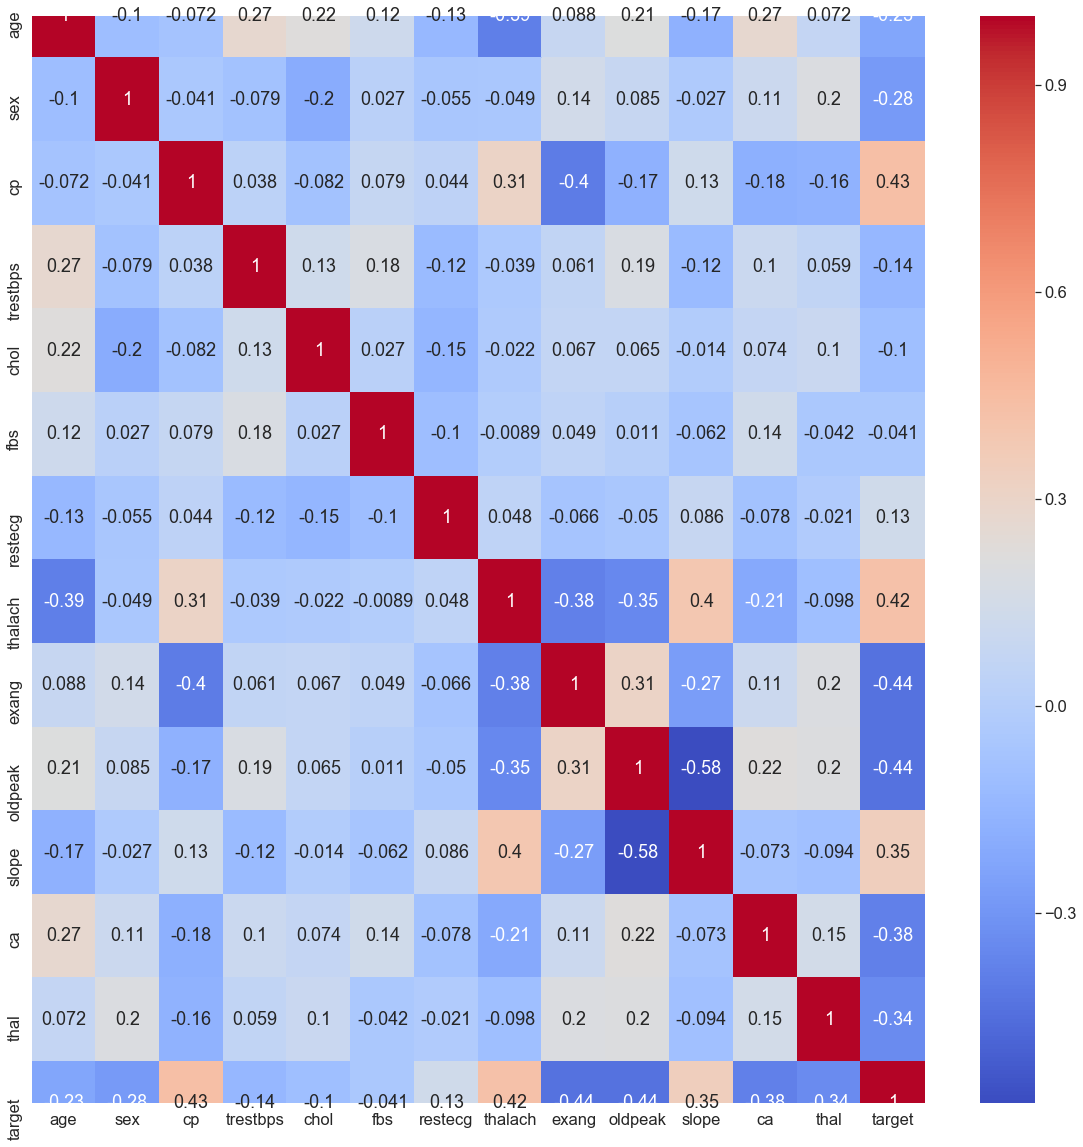

In [109]:
import seaborn as sns
corrmat = df2.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(20,20))
sns.heatmap(df2[top_corr_features].corr(),annot=True, cmap="coolwarm")
plt.show()

In [110]:
df_corr=df2.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list

cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

From the correlation plot we see that cp(chest pain),thalch and slope are highly correlated with the target so we will be more focused on these factors. Now we can analyze and visualize the data.

<font size="5"><b>Data Analysis and Visualization</b></font>

In [111]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "target"
grouped = df2[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

From the graphical representation of target we can see that 51.3% of people have heart disease and the rest 48.7% don't.

In [112]:
col='sex'
d1=df2[df2['target']==0]
d2=df2[df2['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a91818"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#659890"))
data = [trace1, trace2]
layout={'title':"target over the gender(male or female)",'xaxis':{'title':"target"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

From the target over gender(male,female) it's clear that females are more inclined to have a heart disease then males.

In [113]:
col='fbs'
d1=df2[df2['target']==0]
d2=df2[df2['target']==1]
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name=0, marker=dict(color="#a91818"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name=1, marker=dict(color="#659890"))
data = [trace1, trace2]
layout={'title':"target over the person's fasting blood sugar(fbs) ",'xaxis':{'title':"fbs(> 120 mg/dl, 1 = true; 0 = false)"}}
fig = go.Figure(data, layout=layout)
iplot(fig)

People that having the fasting blood sugar rate below 120 mg/dl is affected by heart disease.

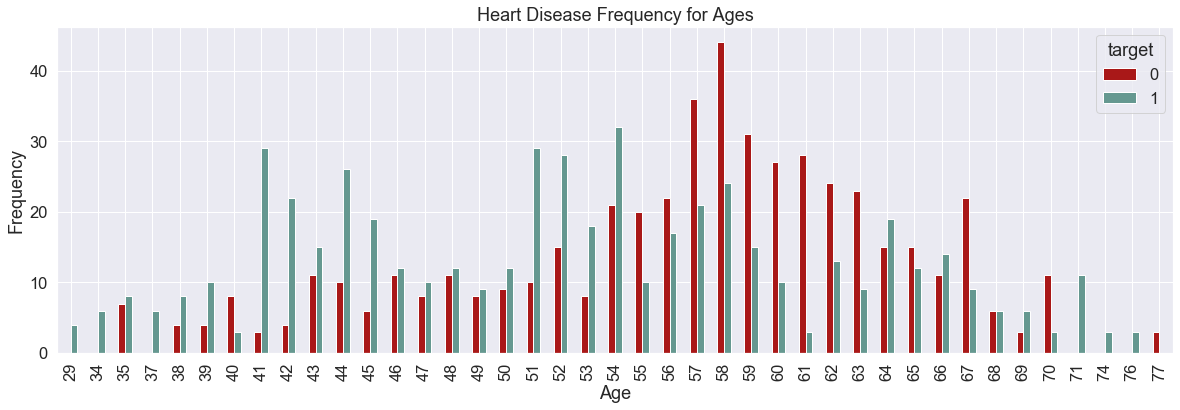

In [114]:
pd.crosstab(df2.age,df2.target).plot(kind="bar",figsize=(20,6),color = ["#a91818", "#659890"] )
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The graphic above represents the frequency of having or not having heart disease at a certain age.

<div><font size="5"><b>Data Processing</b></font></div>
<div>
<font size="3"><b>1.1 Creating dummy variables</b></font>
    </div>

In [115]:
cp = pd.get_dummies(df2['cp'], prefix = "cp", drop_first=True)
thal = pd.get_dummies(df2['thal'], prefix = "thal" , drop_first=True)
slope = pd.get_dummies(df2['slope'], prefix = "slope", drop_first=True)
#'cp', 'thal' and 'slope' has categorical variables we'll turn them into dummy variables 

In [116]:
data = pd.concat([df2, cp, thal, slope], axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,3,0,0,0,0,0,0,1,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,3,0,0,0,0,0,0,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,3,0,0,0,0,0,0,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,3,0,0,0,0,0,0,1,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,2,0,0,0,0,0,1,0,1,0


In [117]:
data.drop(['cp', 'thal', 'slope'], axis=1, inplace=True)
data.head()
#drop the variables cp, thal, slope in the object data as we have created dummy variables 

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,0,0,0,0,0,1,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,0,0,0,0,0,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,0,0,0,0,0,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,0,0,0,0,0,1,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,0,0,0,0,1,0,1,0


In [118]:
#After creating the dummy variables we need to drop target variable. 
x = data.drop(['target'], axis=1)
y = data.target

Representation of all correlations between variables from the dataset:

In [119]:
x.corr()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
age,1.000000,-0.103240,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,0.271551,-0.155137,-0.062574,0.049622,0.048565,-0.127881,0.109369,0.173471,-0.191688
sex,-0.103240,1.000000,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,0.111729,-0.035405,-0.106842,0.083960,0.135659,-0.367115,0.310740,-0.013950,-0.009537
trestbps,0.271121,-0.078974,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,0.104554,-0.087992,-0.054250,0.152188,0.076197,-0.139099,0.106942,0.031390,-0.090362
chol,0.219823,-0.198258,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,0.074259,-0.011117,-0.045654,-0.049381,-0.085388,-0.012472,0.064841,0.062809,-0.040292
fbs,0.121243,0.027200,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,0.137156,-0.066185,0.077124,0.046805,0.095579,-0.088882,0.026825,-0.032623,-0.022019
restecg,-0.132696,-0.055117,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,-0.078072,0.072755,0.080768,-0.068686,-0.006912,0.028947,-0.027176,-0.090182,0.098521
thalach,-0.390227,-0.049365,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,-0.207888,0.250678,0.161594,0.099348,-0.148055,0.284543,-0.210261,-0.420784,0.455748
exang,0.088163,0.139157,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,0.107849,-0.247159,-0.270282,-0.101175,0.063645,-0.327249,0.295004,0.255496,-0.293649
oldpeak,0.208137,0.084687,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,0.221816,-0.280812,-0.151284,0.074983,0.106853,-0.338063,0.297545,0.303453,-0.508445
ca,0.271551,0.111729,0.104554,0.074259,0.137156,-0.078072,-0.207888,0.107849,0.221816,1.000000,-0.140878,-0.080775,-0.072098,0.053753,-0.207305,0.194836,0.135653,-0.113462


In [120]:
x = (x - x.min())/(x.max()-x.min())
x.head()
#Nomalized data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,0.479167,1.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,0.50,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.500000,1.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.854167,1.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.666667,1.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,0.25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.687500,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.75,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<div><font size="3"><b>1.2 Implementation of ML Models and choosing the most suitable one</b></font></div>

We will implement few ML Models to see which will give us the best accuracy in the end.

<div><font size="3"><b>Logistic Regression</b></font></div>

Logistic regression performs binary classification, so the label outputs are binary. It takes a linear combination of features and applies a non-linear function (sigmoid) to it.
As we expecting to receive new data for heart diseases in the future, we should be able to implement such ML model that can be flexible for new data to be processed and <b>logistic regression</b> is one of it.

First of all, we are spliting the <b>80%</b> of the dataset into train_data and <b>20%</b> of the dataset into test_data.

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [122]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logi.fit(x_train, y_train)
Log_acc = logi.score(x_test, y_test)
print("Accuracy: ", Log_acc*100)

Accuracy:  85.36585365853658


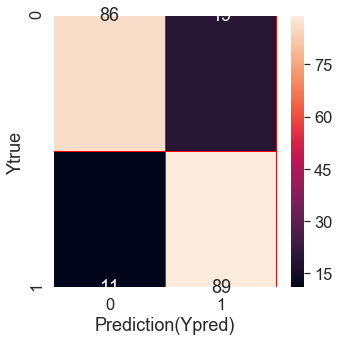

In [123]:
from sklearn.metrics import confusion_matrix 
predicition=logi.predict(x_test)

CM = confusion_matrix(y_test,predicition)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<div><font size="3"><b>Random Forest Prediction</b></font></div>

Random Forest Prediction is described as a ML model with one of the best accuracy of prediction. It can solve both regression and classification problems with large data sets(same as we have). It also helps identify most significant variables from thousands of input variables. Random Forest is highly scalable to any number of dimensions and has generally quite acceptable performances.

In [124]:
from sklearn.ensemble import RandomForestClassifier

RFfind= RandomForestClassifier(n_estimators = 24, random_state=5) 
RFfind.fit(x_train,y_train) 
print("Accurancy: ",RFfind.score(x_test,y_test))
RFCscore=RFfind.score(x_test,y_test)

Accurancy:  0.9853658536585366


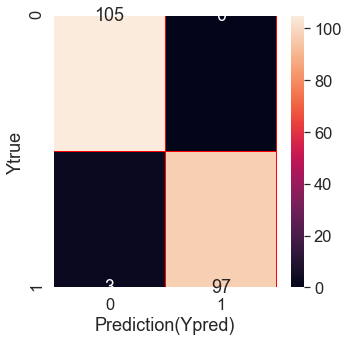

In [125]:
yprediciton2= RFfind.predict(x_test)
y_true = y_test

CM = confusion_matrix(y_true,yprediciton2)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

# Conclusion about Heart_Disease.csv Dataset


For the dataset with the bigger amount of data we implemented two ML Models that, in our point of view, can show the most accurate results for prediction(what is an important point for such problem as Heart Disease). As we can see from both the confusion matrix and accuracy calculations, <b>Random Forest</b> is more suitable in our case to predict Heart Diseases.

# Analysis of second Heart Disease Dataset

In [126]:
%matplotlib inline
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)


In [127]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In order to get concise summary of the dataframe.

In [128]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


This function describe numerical values such as mean, standard deviation, min, max of the dataset.

In [129]:
 df1.shape

(303, 14)

In oder to see how many rows and columns are present in heart_disease dataset.
303 rows and 14 columns.

In [130]:
df1.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<i>Isnull().sum()</i> function helps to find how many missing values in our data. As we can see there is no missing data.

## Data Exploration

We need to explore our data by using various plots using matplotlib.pyplot as plt library,seaborn as sns library. By doing this we can visually analyse each and every variables in our data.

In [131]:
df1.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


This function provides us with the <b>'mean'</b> subset of the <i>describe()</i> method which is regarding with target. 

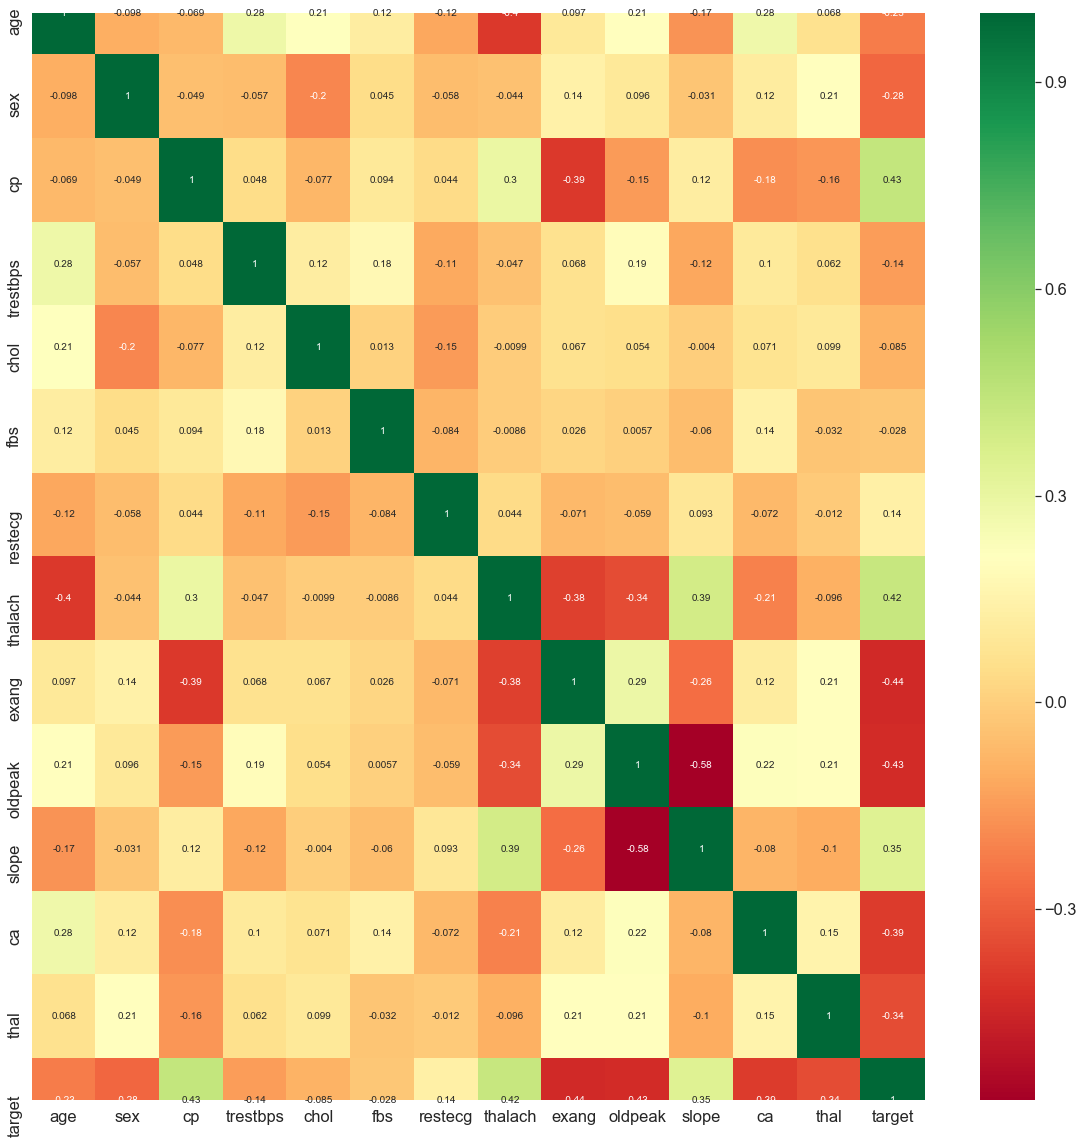

In [132]:
import seaborn as sns 

corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df1[top_corr_features].corr(), annot=True, cmap="RdYlGn")

These functions help to create a table that shows all the correlation between dependent variables. 
Some of them are highly correlated with each other and some no. 
This table helps us to figure out better the relation between variables and decide for the algorithm to be chosen. 

In [133]:
df_corr=df1.corr()['target'][:-1]
feature_list=df_corr[abs(df_corr)>0.1].sort_values(ascending=False)
feature_list


cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

<i>corr()</i> function helps to visualize better which variables are more correlated with the target variable. 
As we can see, <b>cp</b>, <b>thalach</b> and <b>slope</b> are highly correlated with target.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013FE2C21278>,
      dtype=object)

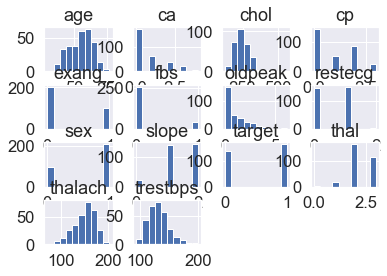

In [134]:
df1.hist()

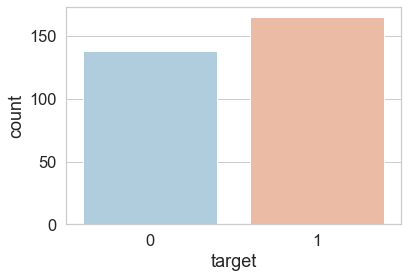

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df1,palette='RdBu_r')

 Counting Regarding target group
0 - No Heart Disease 1 - Suffer from Heart Disease

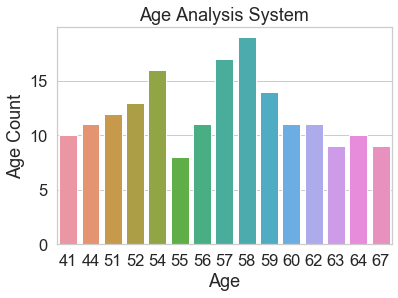

In [136]:
sns.barplot(x=df1.age.value_counts()[:15].index,y=df1.age.value_counts()[:15].values)
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.title('Age Analysis System')
plt.show()

In [137]:
male_disease=df1[(df1.sex==1) & (df1.target==1)]          
male_NO_disease=df1[(df1.sex==1) & (df1.target==0)]       
print(len(male_disease)," males have heart disease")
print(len(male_NO_disease)," males have NO heart disease")

93  males have heart disease
114  males have NO heart disease


Male/Female and Heart Disease (Target)


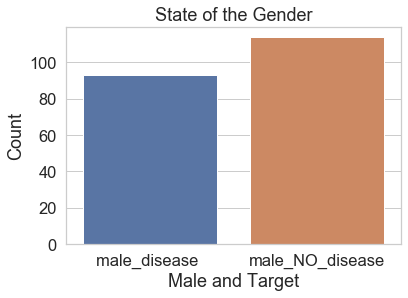

In [138]:
a=len(male_disease)
b=len(male_NO_disease)
sns.barplot(x=['male_disease ','male_NO_disease'],y=[a,b])
plt.xlabel('Male and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

The graph representing the distribution of male which suffer from heart disease and those whos is not. 

In [139]:
female_disease=df1[(df1.sex==0) & (df1.target==1)]         
female_NO_disease=df1[(df1.sex==0) & (df1.target==0)]       
print(len(female_disease)," females have heart disease")
print(len(female_NO_disease)," females have NO heart disease")

72  females have heart disease
24  females have NO heart disease


To distinguish and to represent number of females which respectively suffer or not from heart disease. 

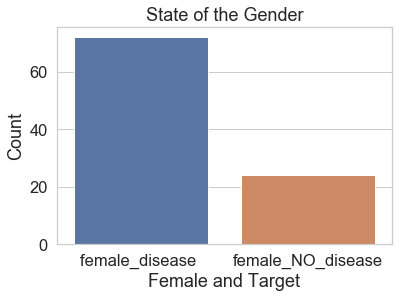

In [140]:
c=len(female_disease)
d=len(female_NO_disease)
sns.barplot(x=['female_disease ','female_NO_disease'],y=[c,d])
plt.xlabel('Female and Target')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

The graph representation of values printed before. From graphical representation we can see that amount of males, that affected by heart disease is lower than the amount of females. <b>Conclusion</b> -> females are more possible to die from heart disease.

# Data Processing

In [141]:
#First use get_dummies method to create dummy columns for categorical variables
dataset= pd.get_dummies(df1, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [142]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Implementation of ML Models 
### 1. Logistic Regression
Logistic regression is the appropriate regression analysis to conduct when the dependent variable is binary. Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Accuracy  85.36585365853658


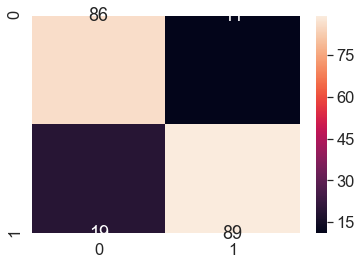

In [143]:
# Model
df = LogisticRegression()
df.fit(x_train, y_train)

# Making predictions
predictions = df.predict(x_test)

# Checking the Accuracy of predictions
log_pred = df.score(x_test, y_test)
print("Accuracy ", log_pred*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

### 2. Decision Tree

<b>Decision trees</b> easily handle feature interactions and they’re non-parametric, so you don’t have to worry about outliers or whether the data is linearly separable. They are simple to understand and interpret and, same as <b>Random Tree Prediction</b> ML model, they work good with big amounts of data, which in our case is an advantage as in the future the prediction of heart diseases will be made based on a huge amount of data about patients.


Accuracy  100.0


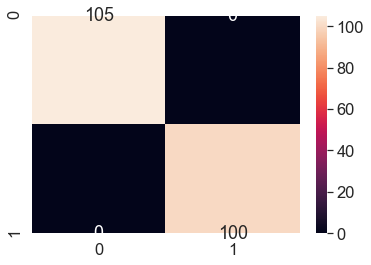

In [144]:
from sklearn.tree import DecisionTreeClassifier
# Model using decision trees
heart_model_dt = DecisionTreeClassifier()

#fiting the model
heart_model_dt.fit(x_train, y_train)

#prediction
dt_predictions = heart_model_dt.predict(x_test)

#Accuracy for testing
DTpred = heart_model_dt.score(x_test, y_test)
print("Accuracy ", DTpred * 100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(dt_predictions, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# Conclusion for dataset heart.csv

We decided to use two ML algorithms: <b>Logistic Regression</b> and <b>Decision Tree Prediction</b> based on the assumption that the dependent variable is a binary one, which get values 0 or 1. 
By implementing those algorithms we concluded on accuracy percentage number for each of them. 
We can say for this dataset the Decision Tree Prediction ML Model has a larger accuracy comparing to the Logistic Regression but considering that for prediction we suppose to get binary result(0 if the patient doesn't have heart disease and 1 in other cases) - it's more appropriate to stick with Logistic Regression Model. 


# Comparison of accuracy of two datasets

In [145]:
models = []
models.append(('Logostic Regression first dataset: ', Log_acc))
models.append(('Logostic Regression second dataset: ', log_pred))
models.append(('Random Tree Prediction fisrt dataset: ', RFCscore))
models.append(('Decision Tree Prediction second dataset: ', DTpred))


for name, model in models:
    print(name,model)

Logostic Regression first dataset:  0.8536585365853658
Logostic Regression second dataset:  0.8536585365853658
Random Tree Prediction fisrt dataset:  0.9853658536585366
Decision Tree Prediction second dataset:  1.0


Text(0.5, 1.0, ' Comparison of accuracy of two datasets')

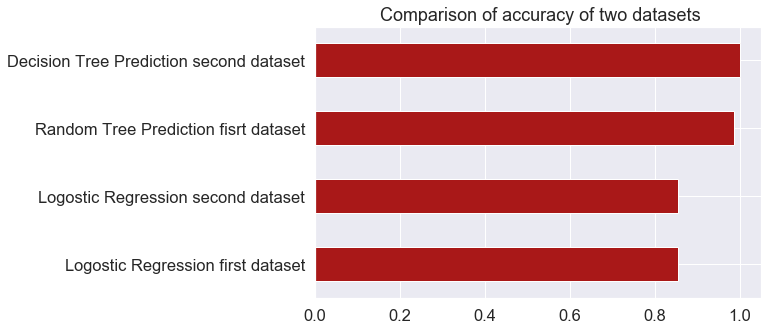

In [146]:
model_accuracy = pd.Series(data=[Log_acc,log_pred,RFCscore,DTpred], 
                index=['Logostic Regression first dataset','Logostic Regression second dataset',
                       'Random Tree Prediction fisrt dataset','Decision Tree Prediction second dataset'])                         
fig= plt.figure(figsize=(8,5))
model_accuracy.sort_values().plot.barh(color = "#a91818" )
plt.title(' Comparison of accuracy of two datasets')

# Conclusion 

Heart disease is considered one of the major problems for society and based on some factors related to this disease, it is possible to estimate for the results. 
Machine Learning is a very useful technique for predicting the output based on some risk factors for heart disease. 
By implementing some Machine Learning algorithms we ended up as a result that for binary data ( suffer from heart disease or not) is good to use the Logistic Regression algorithm.  We conclude it based on the calculated accuracy number and the principle of practicality of use. 